# Practical 3: Digital Elevation Models

In this practical, we'll examine digital elevation models (DEMs) of [Mount Saint Helens](https://en.wikipedia.org/wiki/Mount_St._Helens), a volcano in the West coast of the US. This practical was inspired by a [blog post on Agile Scientific by Evan Bianco](https://agilescientific.com/blog/2014/5/6/how-much-rock-was-erupted-from-mt-st-helens.html).

## General instructions

Type out your answer to questions in the provided *Markdown* cell (delete the placeholder text). 
You can use the code cells provided to do the calculations.

Remember: 
* Double click on a Markdown cell to edit its contents.
* You can write equations in Markdown by surrounding them in `$`. The syntax for the equations is from a program called [LaTeX](https://en.wikipedia.org/wiki/LaTeX). You can learn about the syntax for writing equations with [this guide](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* To get a cheat sheet of Markdown formatting, click on the menu: Help > Markdown Reference.
* Use descriptive variable names.
* Use the `print` function to display the contents of a variable.
* **Be mindful of units!**

Example equation: $\lambda = \dfrac{c}{\nu} = 10\ \mu m$

## Exercise 1

Explain the process for generating DEMs from LiDAR data (physical principles, acquisition, characteristics of the system, initial data type, processing, final product). What are the advantages and limitations of LiDAR for generating DEMs?

---

*Type your answers here.*

## Exercise 2

The goal of this exercise is to **estimate the volume errupted during the [1980 Mount Saint Helens erruption and debris avalanche](https://en.wikipedia.org/wiki/1980_eruption_of_Mount_St._Helens)**. To do this, we'll use two DEMs: one acquired before the eruption and one afterwards. 

In [1]:
from IPython.display import IFrame

IFrame(src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d134413.2573953966!2d-122.27456656213947!3d46.19883069305811!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x54969956568a2691%3A0x69ddb4f4b6cf94c7!2sMt%20St%20Helens!5e1!3m2!1sen!2suk!4v1581928764670!5m2!1sen!2suk", width=600, height=450)

The DEMs are stored in the files `mount-saint-helens-dem-after.txt` and `mount-saint-helens-dem-before.txt`. Open the files (by clicking on them) to see their contents. **The headers have information that you will need.**

These files have been prepared for use in this class before hand. The original DEMs had different resolutions and slightly different coverage. This resulted in different coordinates for each pixel in the DEM. Because of that, we wouldn't be able to directly compare the two. To resolve this problem, I interpolated both DEMs to generate rasters with the same resolution and same coverage.

We'll start, as always, by importing the libraries that we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Complete the code below to load the DEMs from the text files.

In [3]:
dem_after = np.loadtxt("mount-saint-helens-dem-after.txt")
dem_before = np.loadtxt("mount-saint-helens-dem-before.txt")
print(dem_after)

[[ 890.  892.  893. ... 1078. 1078. 1078.]
 [ 890.  892.  893. ... 1071. 1071. 1071.]
 [ 890.  892.  893. ... 1071. 1071. 1071.]
 ...
 [ 883.  883.  883. ...  931.  930.  930.]
 [ 881.  881.  881. ...  931.  930.  930.]
 [ 881.  881.  881. ...  931.  930.  930.]]


A useful thing to know is the minimum and maximum values of the arrays.

In [4]:
print(np.min(dem_after), np.max(dem_after))
print(np.min(dem_before), np.max(dem_before))

680.0 2550.0
676.0 2951.0


Use the cell below to plot the two DEMs. Use `plt.colorbar` to plot colorbars next to the images. 

When comparing two plots, it's important to have **both colorbars in the same range**. Do so by specifying the same `vmin` and `vmax` both times you call `plt.imshow` (hint: use the values you found above). 

It's also good training to **label your axis**. Use `plt.title`, `plt.xlabel`, and `plt.ylabel`.

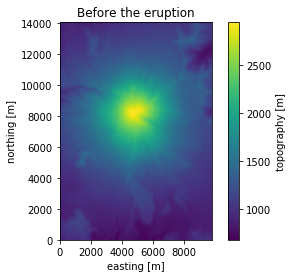

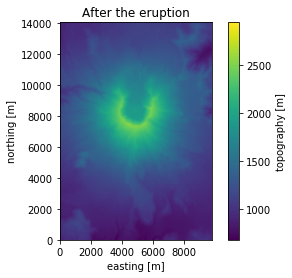

In [5]:
resolution = 10  # meters (see the data files)
# extent is used to have the axis in meters instead of pixel number
extent = [0, dem_before.shape[1]*resolution, 0, dem_before.shape[0]*resolution]

plt.figure()
plt.title("Before the eruption")
# aspect is used to make sure pixels are square (not rectangular)
# This is only needed when using extent.
plt.imshow(dem_before, extent=extent, aspect=1, vmin=676, vmax=2951)
plt.colorbar(label="topography [m]")
plt.xlabel("easting [m]")
plt.ylabel("northing [m]")

plt.figure()
plt.title("After the eruption")
plt.imshow(dem_after, extent=extent, aspect=1, vmin=676, vmax=2951)
plt.colorbar(label="topography [m]")
plt.xlabel("easting [m]")
plt.ylabel("northing [m]")

plt.show()

Calculate the difference between the two DEMs to measure the amount of topographic change caused by the eruption and debris avalanche. Make a plot of the difference. Remeber that numpy lets you perform operations on entire arrays, instead of element by element with a `for` loop.

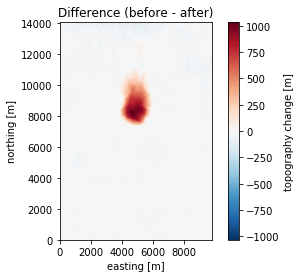

In [6]:
difference = dem_before - dem_after

# Since this is an "anomaly", we'll be using a diverging colormap
# To make sure the zero is in the center of the colorbar, we need
# to know the maximum absolute value of the data.
scale = np.max(np.abs(difference))

plt.figure()
plt.title("Difference (before - after)")
plt.imshow(difference, extent=extent, aspect=1, vmin=-scale, vmax=scale, cmap='RdBu_r')
plt.colorbar(label="topography change [m]")
plt.xlabel("easting [m]")
plt.ylabel("northing [m]")

plt.show()

Calculate the **total volume** of material moved by the eruption and debris avalanche in **cubic kilometers**. You will need to know the *resolution* of the raster DEM.

You can do this with two `for` loops and an aggregator pattern *or* using numpy as no `for` loops. Try solving this both ways.

In [7]:
# With for loops
volume_change = 0
for i in range(difference.shape[0]):
    for j in range(difference.shape[1]):
        volume_change += difference[i, j]
volume_change *= resolution**2
print("Total volume change: {:.2f} km³".format(volume_change / 1e9))

Total volume change: 1.62 km³


In [8]:
# Without loops
volume_change = np.sum(difference) * resolution**2
print("Total volume change: {:.2f} km³".format(volume_change / 1e9))

Total volume change: 1.62 km³


Which factors impact the uncertainty of this estimate?

----

1. The resolution of the DEMs.
2. The interpolation method to produce two DEMs with the same resolution and coverage (i.e., *coregistered DEMs*).
3. The area chosen for the total volume calculation. Negative changes in the area will cancel out the positive changes in the volcano summit.
4. The uncertainty in the original data for both DEMs.